In [2]:
import urllib.request
import zipfile
import os
import ssl

try:
    os.mkdir("files")
except:
    pass

ssl._create_default_https_context = ssl._create_unverified_context

with urllib.request.urlopen('https://courses.cs.tau.ac.il/pyProg/2526a/resources/notebook_resources.zip') as f:
    content = f.read()

with open('files/notebook_resources.zip', 'wb') as f:
    f.write(content)

with zipfile.ZipFile('files/notebook_resources.zip', 'r') as zip_ref:
    zip_ref.extractall('files')

print(os.listdir('files'))

['baby.png', 'countries-of-the-world.csv', 'dialation.png', 'dialation_2.png', 'dog.png', 'dog_noised.png', 'erosion.png', 'erosion_2.png', 'evil_morty_1.png', 'evil_morty_change.png', 'evil_morty_change_3.png', 'evil_morty_change_noised.png', 'evil_morty_segmentation.png', 'ex1.csv', 'ex2.csv', 'foods.txt', 'infile1.txt', 'infile2.txt', 'koala.png', 'monday.txt', 'notebook_resources.zip', 'orders_2_2024.csv', 'orders_3_2024.csv', 'orders_4_2024.csv', 'out.txt', 'products2.csv', 'ship.png', 'StudentsGrades.csv', 'sunday.txt', 'witcher_1.csv', 'witcher_2.csv', 'woman_noised.png', '__MACOSX']


**שימו לב**: על מנת להריץ את התאים ב-Live Code, יש לייבא תחילה את ספרית `numpy` ע"י הרצת השורת הבאה:

In [3]:
import numpy as np

# ייצוג תמונות במחשב

In [1]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/7EBPz5N2Vvk" title="numpy 3" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" referrerpolicy="strict-origin-when-cross-origin" allowfullscreen></iframe>

```{admonition}  טקסט המופיע למטה בסגול מציין קטעים המופיעים בסרטון    
:class: custom-text
ניתן להיעזר בו כדי לחזור על התכנים או לעיין בהם שוב.
```

<span class=custom-text-content> 

בהמשך נושא זה נלמד כיצד ניתן לנתח ולערוך תמונות באמצעות `numpy`, אך קודם לכן, חשוב להבין כיצד תמונות מיוצגות במחשב, ובפרט ב-`numpy`.  

</span>

<span class=custom-text-content> 

ניתן לחשוב על תמונה כאוסף של יחידות קטנות מאוד הנקראות **פיקסלים (Pixels)**. הפיקסלים הם למעשה הנקודות הבודדות שמרכיבות את התמונה כולה, והם מאורגנים כמטריצה דו־ממדית. 

</span>

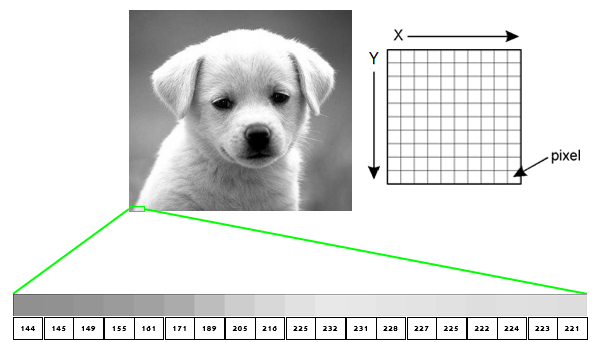

<span class=custom-text-content> 

בתמונות בגווני אפור לכל פיקסל ישנו **ערך בהירות (intensity) - מספר שלם בין 0 ל255 (כלומר, 256 אפשרויות שונות)**, כאשר 0 מייצג שחור מוחלט, 255 מייצג לבן מוחלט, וכל ערך ביניהם מייצג רמת אפור אחרת.   
כך למשל, ערך 200 יתפרש כאפור בהיר, ו50 יתפרש כאפור כהה יחסית. בצורה זו אפשר לבטא רצף חלק של בהירות ולייצר תמונות שנראות רציפות לעין.

</span>

<span class=custom-text-content> 

לעומת זאת, בתמונות צבעוניות לכל פיקסל ישנם **שלושה ערכי בהירות – אחד עבור כל ערוץ צבע: אדום (R), ירוק (G) וכחול (B)**.   
גם ערוצי הצבע מיוצגים בעזרה מספרים בין 0 ל־255, כך שבעזרת שילוב של שלושת הערוצים ניתן לייצג כמעט כל צבע נראה לעין. לדוגמה, פיקסל עם ערכים (0, 0, 255) יהיה אדום טהור, בעוד שפיקסל עם ערכים (0, 0, 0) יהיה שחור.   

</span>

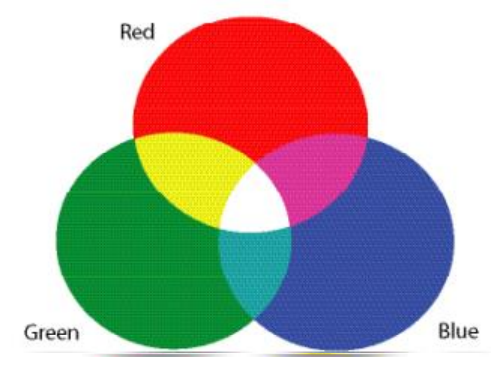


```{admonition} **נסו בעצמכם!**
:class: caution

היכנסו ל[כאן](https://www.csfieldguide.org.nz/en/interactives/rgb-mixer/) וחפשו את ערכי הבהירות של הצבע האהוב עליכם! 
```

<span class=custom-text-content> 

במונחי `numpy`, המשמעות היא ש**תמונה צבעונית מיוצגת ע"י מטריצה תלת-ממדית**: שני ממדים למיקום הפיקסלים (שורה ועמודה), וממד נוסף לערוצי הצבע.

בקורס נתמקד בתמונות אפורות (המיוצגות ע"י מטריצות דו-מימדיות), אך כדאי להבין כי הייצוג של תמונות צבעוניות דומה – בתוספת מימד נוסף.

</span>

<span class=custom-text-content> 

**הרזולוציה (Resolution)** של התמונה מתארת את מספר הפיקסלים שיש בה – כלומר כמה שורות ועמודות של פיקסלים. **ככל שיש יותר פיקסלים, כך איכות התמונה גבוהה יותר**, משום שניתן לייצג פרטים קטנים יותר.   

</span>

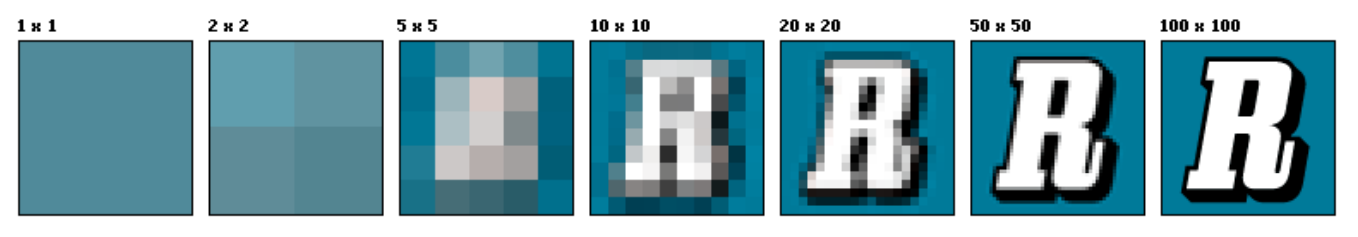

```{admonition} **מעניין לדעת!**  
:class: note
תמונת Full HD כוללת רזולוציה של 1,920×1,080 פיקסלים (בערך שני מיליון פיקסלים בסך הכל), ואילו תמונת 4K כוללת 3,840×2,160 פיקסלים (כ־8 מיליון פיקסלים).

### Grayscale Images

<span class=custom-text-content> 

כעת אנו מבינים כי תמונות מורכבות ממספר רב של מספרים, וברזולוציות גבוהות נדרשים אף מליוני פיקסלים כדי לייצג תמונה. לכן, חסכון בביטים המייצגים כל פיקסל הוא משמעותי ביותר.   
מכיוון שקיימים 256 ערכי בהירות אפשריים - ניתן לייצג כל פיקסל באמצעות 8 ביטים בלבד בשיטת הייצוג הבינארי (כפי שלמדנו בתחילת הקורס). 

ייצוג זה הרבה יותר חסכוני מייצוג טיפוס `int` רגיל, בו היו מוקצים עבור כל פיקסל מספר גדול יותר של ביטים וגודל הקובץ של התמונה היה דורש שימוש בהרבה מאוד זיכרון ואחסון. 

</span>  

```{admonition} **תזכורת:** מה זה ביטים ולמה נדרשים רק 8 מהם?
:class: dropdown, info


ביט (bit) הוא יחידת המידע הבסיסית ביותר במחשב, והוא יכול לקבל רק אחד משני ערכים: 0 או 1. אם יש לנו 8 ביטים (כלומר רצף של שמונה אפסים ואחדים), מספר הצירופים האפשריים הוא 2⁸ = 256.

לכן, ניתן לייצג בעזרת 8 ביטים את כל הערכים השלמים מ־0 ועד 255. כל פיקסל בתמונה נשמר בזיכרון כמספר בינארי בן 8 ספרות (בבסיס 2), והמערכת מתרגמת אותו לערך עשרוני בין 0 ל־255. כך למשל, המספר הבינארי 11111111 מייצג את הערך 255 (לבן), והמספר 00000000 מייצג את הערך 0 (שחור). 

```

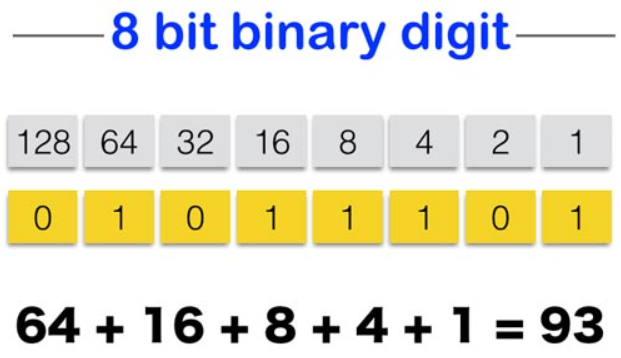</td><td>

## הצגת תמונות בפייתון

<span class=custom-text-content> 

עכשיו, לאחר שלמדנו כיצד תמונות מיוצגות במחשב, נלמד לעבוד עם תמונות בפייתון.

הצעד הראשון הוא **לטעון את התמונה לתכנית כך שנוכל לייצג אותה כמערך של `numpy`**. לשם כך נשתמש בפונקציה `imread` מתוך הספרייה `imageio`. פונקציה זו קוראת את קובץ התמונה מהדיסק ומחזירה אותו כ**מטריצת `numpy`**, שבו כל ערך מייצג פיקסל בהתאם לסוג התמונה (גווני אפור או צבע).  

ברגע שהתמונה נטענת בהצלחה, היא הופכת למערך `numpy` שניתן לבצע עליו פעולות שונות שנלמד בהמשך – כמו בדיקת הממדים, הצגה על המסך, ועיבודים שונים.  

</span>

```{admonition} **שימו לב**
:class: error

בדוגמאות בקורס נשתמש בקבצי תמונה שהכנו מראש כמו `files/dog.png`. חשוב לוודא שהקובץ הזה אכן קיים בספרייה המתאימה לפני שמריצים את הקוד, אחרת הקריאה ל־`imread` תיכשל. 

```

In [1]:
import imageio

In [31]:
im_dog = imageio.v3.imread('files/dog.png')
print(im_dog) 

[[ 88  88  88 ...  61  60  60]
 [ 89  88  88 ...  61  60  60]
 [ 89  89  89 ...  61  61  61]
 ...
 [143 143 145 ... 103 102 102]
 [144 145 149 ... 103 102 102]
 [144 145 149 ... 103 102 102]]


In [32]:
print(type(im_dog), im_dog.dtype)

<class 'numpy.ndarray'> uint8


```{admonition} **שימו לב**
:class: error

טיפוס הערכים במטריצת התמונה (`im_dog.dtype`) הוא `uint8`. מדובר בטיפוס המייצג `int` אי-שלילי באמצעות 8 ביטים.   
במילים אחרות, טווח המספרים השלמים 0 עד 255.

הטיפוס `uint8` שייך לNumPy בלבד. כלומר, כדי לפנות אליו יש לכתוב `np.uint8`.

```

<span class=custom-text-content> 

כדי **להציג תמונה** ששמורה לנו כמערך ב`numpy` , נשתמש בפונקציה `imshow` מתוך ספריית `matplotlib`. הפונקציה הזו יודעת לצייר את מערך הפיקסלים כתמונה על המסך.  
למעשה, היא מאפשרת לנו לוודא שהטעינה והעיבודים שעשינו לתמונה אכן התבצעו כהלכה, על ידי הדמיה ויזואלית של התוצאה.  

</span>

In [2]:
import matplotlib.pyplot as plt

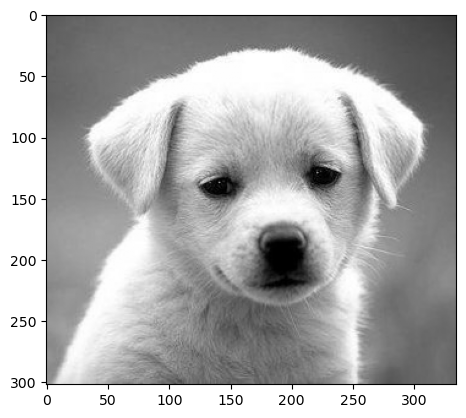

In [39]:
plt.imshow(im_dog,cmap='gray')

```{admonition} **שימו לב**
:class: error
אין צורך לדעת כיצד להציג תמונות עם `matplotlib`. נשתמש בה רק כאשר היא כבר תופיע מוכנה בקוד - למשל, בבלוקים מסוימים במחברות עם הקיצור `plt`, או בקבצי התרגול והבדיקות שסופקו לכם. כך נוכל להתרכז בלוגיקה של עיבוד התמונה, ולהשתמש ב־`imshow` ככלי עזר להצגה ויזואלית בלבד.  
```

<span class=custom-text-content> 

וכיצד **"נצייר" תמונה חדשה**?   
למעשה, כבר עשינו זאת כאשר למדנו לייצר מטריצות. 

לדוגמא, המטריצות הבאות יתנו תמונות שחורות ולבנות.

</span>

In [40]:
zeros=np.zeros((100,100))

In [41]:
ones = np.ones((100,100)) * 255

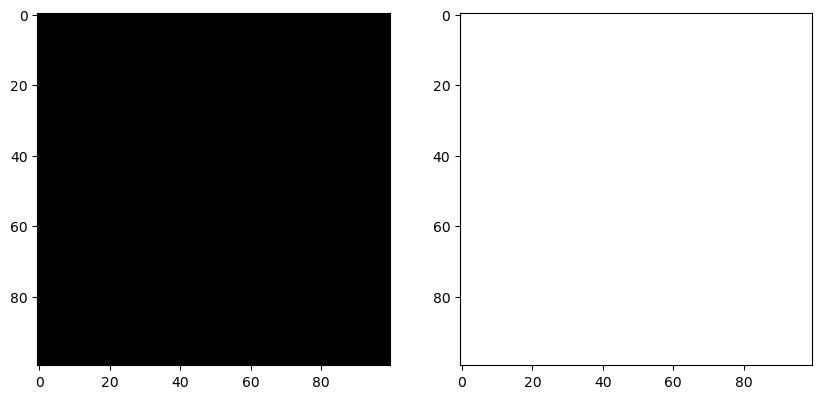

In [42]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(zeros,vmin=0, vmax=255,cmap=plt.cm.gray)
plt.subplot(1, 2, 2)
plt.imshow(ones,vmin=0, vmax=255,cmap=plt.cm.gray)
plt.show()

**נסו בעצמכם!** שנו את הקוד כך שיציג בכל פיקסל ערך בהירות אקראי.

In [ ]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(zeros,vmin=0, vmax=255,cmap=plt.cm.gray)
plt.show()

```{admonition} **לחצו כאן כדי לצפות בפתרון**
:class: dropdown, tip
``` python
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(np.random.randint(0,256,(100,100)),vmin=0, vmax=255,cmap=plt.cm.gray)
plt.show()
```

ביחידות הבאות נלמד אילו פעולות ניתן לעשות על תמונות לאחר שטענו אותן לזכרון.